# Import libs

In [1]:
import pandas as pd
import numpy as np
from models.knn.knn import knn
from models.dmc.dmc import dmc
from models.kmeans.kmeans import kmeans
from models.naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from models.bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Artificial II dataset

In [2]:
Xy = pd.read_csv('./datasets/artificial_II.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
nb_hit_rate_list = []
b_hit_rate_list = []

knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
nb_std_dev = 0
b_std_dev = 0

knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []
nb_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     1.0  2.0  3.0
1.0    5    0    0
2.0    0   10    0
3.0    0    0    1
     2.0  1.0  3.0
2.0    6    0    0
1.0    0    7    0
3.0    0    0    3
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    7    0
3.0    0    0    3
     3.0  2.0  1.0
3.0    6    0    0
2.0    0    6    0
1.0    0    0    4
     3.0  1.0  2.0
3.0    3    0    0
1.0    0    8    0
2.0    0    0    5
     3.0  1.0  2.0
3.0    8    0    0
1.0    0    4    0
2.0    0    0    4
     3.0  1.0  2.0
3.0    7    0    0
1.0    0    3    0
2.0    0    0    6
     1.0  3.0  2.0
1.0    6    0    0
3.0    0    4    0
2.0    0    0    6
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    6    0
3.0    0    0    4
     2.0  3.0  1.0
2.0    3    0    0
3.0    0    5    0
1.0    0    0    8
     3.0  1.0  2.0
3.0  

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,1.0,2.0,3.0
1.0,5,0,0
2.0,0,6,0
3.0,0,0,4


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     1.0  2.0  3.0
1.0    5    0    0
2.0    0   10    0
3.0    0    0    1
     2.0  1.0  3.0
2.0    6    0    0
1.0    0    7    0
3.0    0    0    3
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    7    0
3.0    0    0    3
     3.0  2.0  1.0
3.0    6    0    0
2.0    0    6    0
1.0    0    0    4
     3.0  1.0  2.0
3.0    3    0    0
1.0    0    8    0
2.0    0    0    5
     3.0  1.0  2.0
3.0    8    0    0
1.0    0    4    0
2.0    0    0    4
     3.0  1.0  2.0
3.0    7    0    0
1.0    0    3    0
2.0    0    0    6
     1.0  3.0  2.0
1.0    6    0    0
3.0    0    4    0
2.0    0    0    6
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    6    0
3.0    0    0    4
     2.0  3.0  1.0
2.0    3    0    0
3.0    0    5    0
1.0    0    0    8
     3.0  1.0  2.0
3.0  

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,1.0,2.0,3.0
1.0,5,0,0
2.0,0,6,0
3.0,0,0,4


# Showing kmeans informations computed

In [8]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     1.0  2.0  3.0
1.0    5    0    0
2.0    0   10    0
3.0    0    0    1
     2.0  1.0  3.0
2.0    6    0    0
1.0    0    7    0
3.0    0    0    3
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    7    0
3.0    0    0    3
     3.0  2.0  1.0
3.0    6    0    0
2.0    0    6    0
1.0    0    0    4
     3.0  1.0  2.0
3.0    3    0    0
1.0    0    8    0
2.0    0    0    5
     3.0  1.0  2.0
3.0    8    0    0
1.0    0    4    0
2.0    0    0    4
     3.0  1.0  2.0
3.0    7    0    0
1.0    0    3    0
2.0    0    0    6
     1.0  3.0  2.0
1.0    6    0    0
3.0    0    4    0
2.0    0    0    6
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    6    0
3.0    0    0    4
     2.0  3.0  1.0
2.0    3    0    0
3.0    0    5    0
1.0    0    0    8
     3.0  1.0  2.0
3.

In [9]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,1.0,2.0,3.0
1.0,5,0,0
2.0,0,6,0
3.0,0,0,4


# Showing naive bayes informations computed

In [10]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     1.0  2.0  3.0
1.0    5    0    0
2.0    0   10    0
3.0    0    0    1
     2.0  1.0  3.0
2.0    6    0    0
1.0    0    7    0
3.0    0    0    3
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    7    0
3.0    0    0    3
     3.0  2.0  1.0
3.0    6    0    0
2.0    0    6    0
1.0    0    0    4
     3.0  1.0  2.0
3.0    3    0    0
1.0    0    8    0
2.0    0    0    5
     3.0  1.0  2.0
3.0    8    0    0
1.0    0    4    0
2.0    0    0    4
     3.0  1.0  2.0
3.0    7    0    0
1.0    0    3    0
2.0    0    0    6
     1.0  3.0  2.0
1.0    6    0    0
3.0    0    4    0
2.0    0    0    6
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    6    0
3.0    0    0    4
     2.0  3.0  1.0
2.0    3    0    0
3.0    0    5    0
1.0    0    0    8
     3.0  1.0  2

In [11]:
confusion_matrix_mean(nb_confusion_matrix_list)

,1.0,2.0,3.0
1.0,5,0,0
2.0,0,6,0
3.0,0,0,4


# Showing bayes informations computed

In [12]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     1.0  2.0  3.0
1.0    5    0    0
2.0    0   10    0
3.0    0    0    1
     2.0  1.0  3.0
2.0    6    0    0
1.0    0    7    0
3.0    0    0    3
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    7    0
3.0    0    0    3
     3.0  2.0  1.0
3.0    6    0    0
2.0    0    6    0
1.0    0    0    4
     3.0  1.0  2.0
3.0    3    0    0
1.0    0    8    0
2.0    0    0    5
     3.0  1.0  2.0
3.0    8    0    0
1.0    0    4    0
2.0    0    0    4
     3.0  1.0  2.0
3.0    7    0    0
1.0    0    3    0
2.0    0    0    6
     1.0  3.0  2.0
1.0    6    0    0
3.0    0    4    0
2.0    0    0    6
     1.0  2.0  3.0
1.0    6    0    0
2.0    0    6    0
3.0    0    0    4
     2.0  3.0  1.0
2.0    3    0    0
3.0    0    5    0
1.0    0    0    8
     3.0  1.0  2.0
3.0

In [13]:
confusion_matrix_mean(b_confusion_matrix_list)

,1.0,2.0,3.0
1.0,5,0,0
2.0,0,6,0
3.0,0,0,4


# Choosing two columns from the last X_train and X_test to plot decision surface

In [14]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
           0         1
53  1.115226  0.773344
12 -0.949441 -0.780632
47 -1.206665  1.237285
2  -0.886640 -1.226973
41 -1.151050  1.283939
68  0.723305  0.903964
10 -0.889160 -0.946495
64  0.922192  1.453510
15 -0.755261 -1.213144
43 -1.204885  1.303805
44 -1.196349  1.375020
5  -0.945419 -0.642560
18 -0.927113 -0.750590
72  0.930483  0.963600
75  0.939403  1.307332
21 -0.702791 -0.797646
8  -1.225754 -1.070653
40 -0.848696  1.118836
58  0.900284  0.954124
28 -0.922080  0.877525
13 -0.718327 -1.348600
35 -1.199352  0.909633
61  1.260577  0.821875
45 -1.125646  0.934195
32 -0.893702  1.002027
36 -1.213524  0.635762
20 -0.873365 -0.995564
62  0.721496  1.119976
67  0.993906  0.654170
22 -0.978049 -0.694943
65  1.011157  1.090047
48 -1.021551  0.843029
19 -0.856003 -0.560455
74  1.188046  0.752483
51  0.579957  0.918571
3  -1.015426 -0.986525
23 -0.859289 -1.056941
14 -1.016362 -0.853092
31 -1.539498  0.930443
59  1.446291  1.044398
39 -1.155444  1.063141
25 -1.001668  1.236

# Training the models with the new dataset 2d

In [15]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

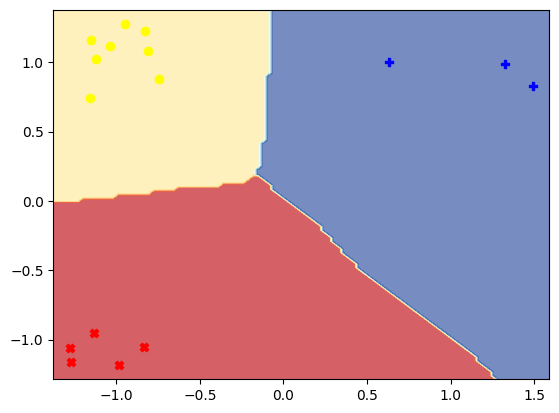

In [16]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

one = np.where(knn_y_pred == 1)
two = np.where(knn_y_pred == 2)
three = np.where(knn_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting dmc decision surface

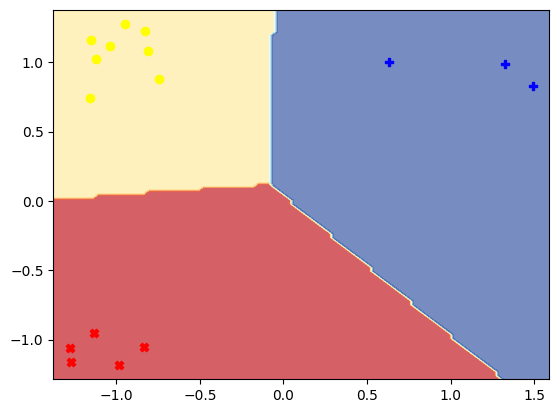

In [17]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

one = np.where(dmc_y_pred == 1)
two = np.where(dmc_y_pred == 2)
three = np.where(dmc_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting kmeans decision surface

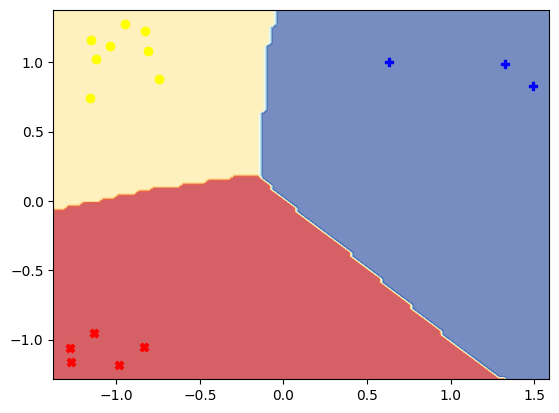

In [18]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

one = np.where(kmeans_y_pred == 1)
two = np.where(kmeans_y_pred == 2)
three = np.where(kmeans_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting naive bayes decision surface

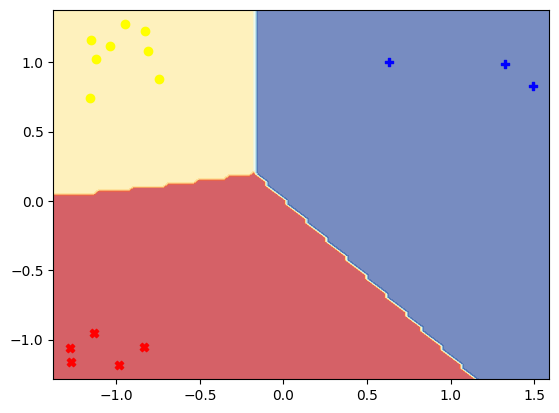

In [19]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

one = np.where(nb_y_pred == 1)
two = np.where(nb_y_pred == 2)
three = np.where(nb_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting bayes decision surface

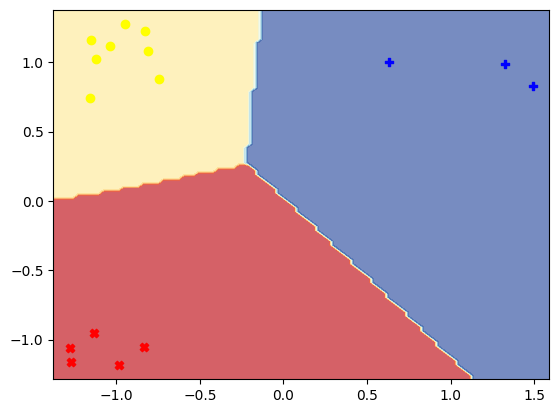

In [20]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

one = np.where(b_y_pred == 1)
two = np.where(b_y_pred == 2)
three = np.where(b_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()